# Predicting heart disease using machine learning

This notebook looks into using python-based machine learning and data science
libraries in an attempt to build a machine learing model capable of predictiong wheather or
not someone has heart-disease based on their medical attributes

We're going to take the following approach:
   * 1.Problem defination
   * 2.Data
   * 3.Evaluation
   * 4.Features
   * 5.Modelling
   * 6.Experimentation
    
    
## 1. Problem Definition

* Given clinical parameters about a patient, can we predict wheather or not they have heart-disease?

## 2.Data

* The original data come form UCI machine learning Repository.

## 3. Evaluation

* If we can reach 95% accuracy at predicting wheather or not a patient has heart-disease during the proof of concept, we'll pusue the project.

## 4. Features or Attributes

Only 14 attributes used:
   1. id (Unique id for each patient)
   2. age (Age of the patient in years)
   3. origin (place of study)
   4. sex (Male/Female)
   5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
   6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
   7. chol (serum cholesterol in mg/dl)
   8. fbs (if fasting blood sugar > 120 mg/dl)
   9. restecg (resting electrocardiographic results)
    -- Values: [normal, stt abnormality, lv hypertrophy]
   10. thalach: maximum heart rate achieved
   11. exang: exercise-induced angina (True/ False)
   12. oldpeak: ST depression induced by exercise relative to rest
   13. slope: the slope of the peak exercise ST segment
   14. ca: number of major vessels (0-3) colored by fluoroscopy
   15. thal: [normal; fixed defect; reversible defect]
    num: the predicted attribute

In [1]:
import sklearn
sklearn.__version__

'1.2.1'

## Preparaing the tools
 
We're going to use pandas,matplotlib and Numpy for data analysis.

In [2]:
# Regular EDA( exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# we want our plots to apper inside the notebook

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,classification_report
from sklearn.metrics import confusion_matrix,recall_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

## Load data

In [3]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject export on the data set you're working with.

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# It is a balanced data set
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

[]

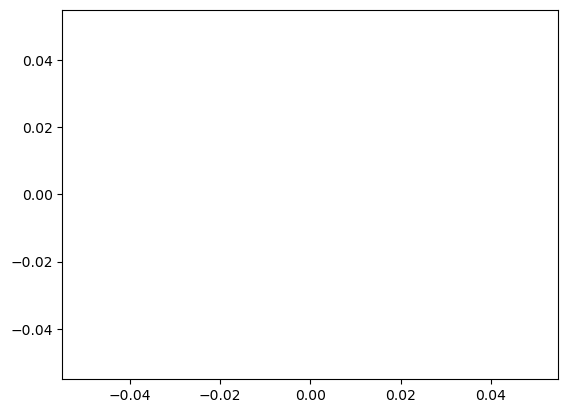

In [7]:
plt.plot()

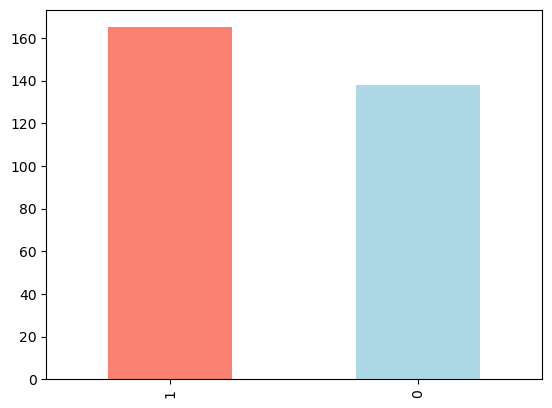

In [8]:
df["target"].value_counts().plot(kind='bar',color=['salmon','lightblue']);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Sex

In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
# compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


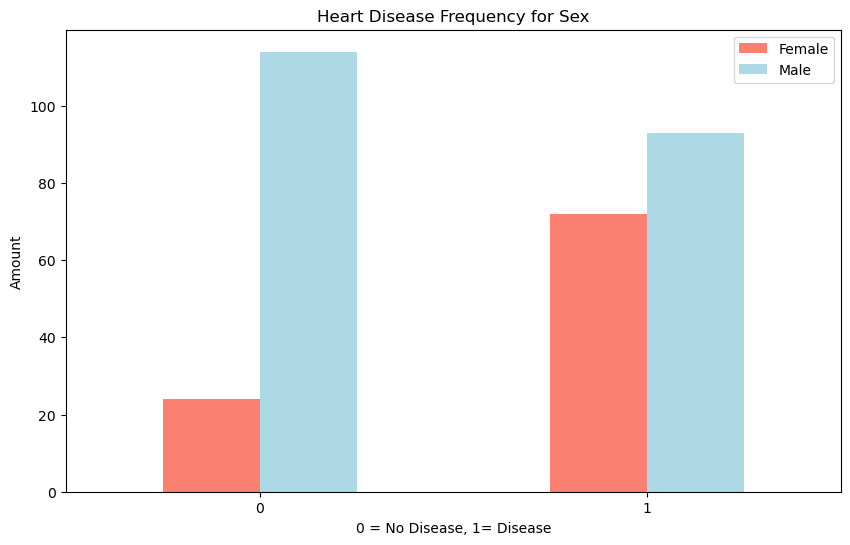

In [14]:
# create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6),
                                  color=["salmon",'lightblue'])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

### Age vs.Max Heart Rate for Heart-disease

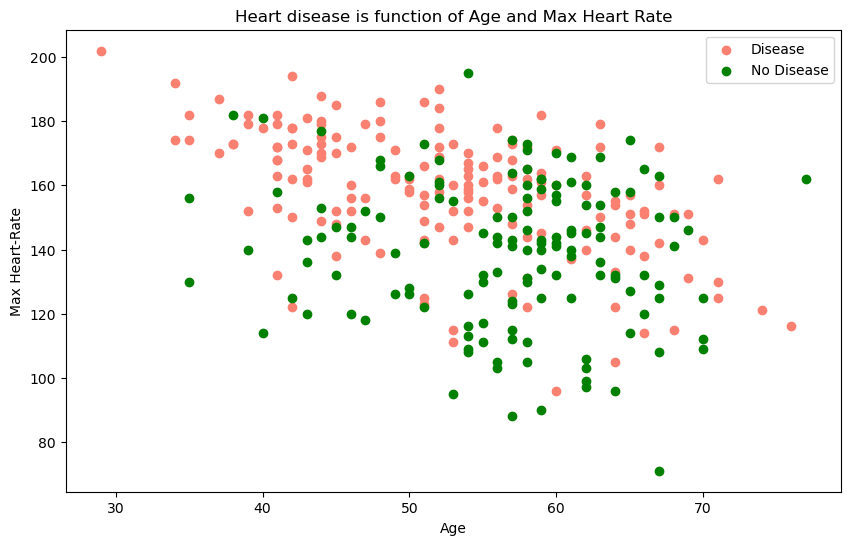

In [15]:
# create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="green");

plt.title("Heart disease is function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart-Rate")
plt.legend(['Disease',"No Disease"]);

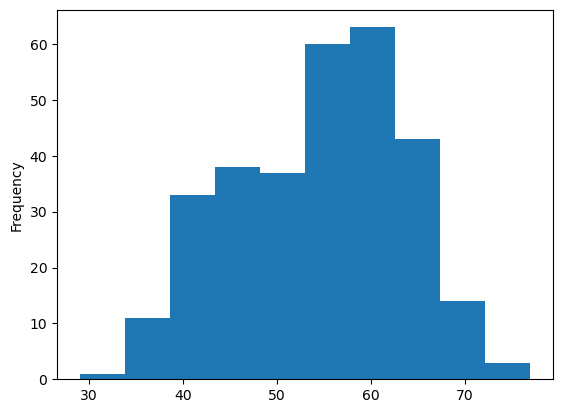

In [16]:
df.age.plot.hist();

## Heart Disease Frequency per Chest Pain Type

    3.cp: chest pain type
    -- Value 0: typical angina
    -- Value 1: atypical angina
    -- Value 2: non-anginal pain
    -- Value 3: asymptomatic

In [17]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


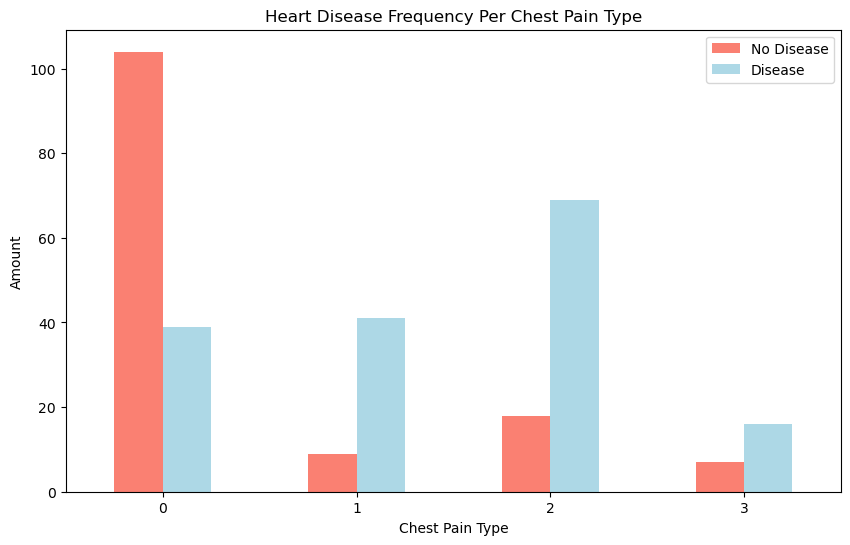

In [18]:
# Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6),
                                 color = ['salmon','lightblue'])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


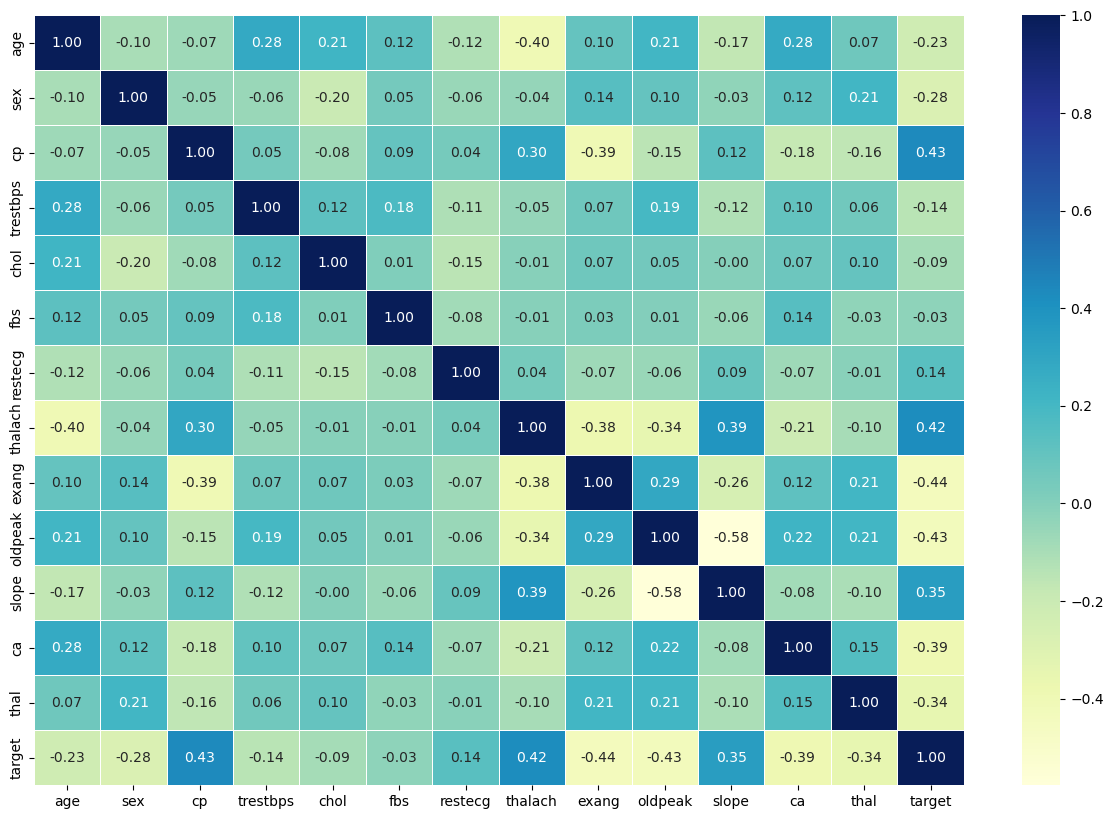

In [21]:
# Let's make our correlation matirx a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap='YlGnBu')


In [22]:
pd.crosstab(df.exang,df.target)

target,0,1
exang,,
0,62,142
1,76,23


## 5. Modelling

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [25]:
# split data into x and y
x=df.drop('target', axis = 1)
y=df['target']


In [26]:
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)


 ** Now we want to try different machine learning models to get a good accuracy
    
    1.

NOw we're got our data split into training and test sets, it's time to build a machine learning model.

we'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

WE're going to try 3 different machine learning models.
  *  1.Logistic Regression
  * 2.K-Nearest Neighbors
  * 3.RandomForestClassifier

In [27]:
# Put models ia a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evaluates given machine learing models.
    
    """

    # set a random seed
    np.random.seed(42)
    #Make a dictonary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test,y_test)
        
    return model_scores
    

In [28]:
model_scores=fit_and_score(models,x_train,x_test,y_train,y_test)
model_scores

C:\Users\jayan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [29]:
model_compare = pd.DataFrame(model_scores,index =["accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


<AxesSubplot:>

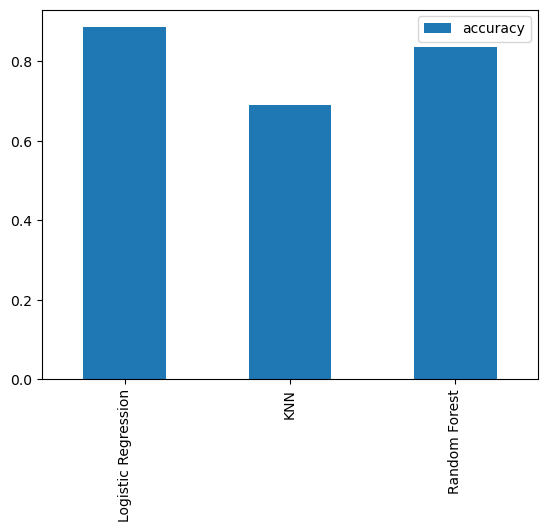

In [30]:
model_compare.T.plot.bar()

Now we've got a baseline model... and we know a model's first
predictions aren't always what we should based our next 
steps off.

Let's look at the following:
* Hyperparameter tuning
* Feature importanece
* Confusion matrix
* cross_validation
* precision
* recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter Tuning

In [31]:
# Lets tune KNN

train_scores = []
test_scores = []

# Create a list of different values of n_neighbors
neighbors=range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the model
    knn.fit(x_train,y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(x_train,y_train))
    
    # Updata the test scores list
    test_scores.append(knn.score(x_test,y_test))



In [32]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [33]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


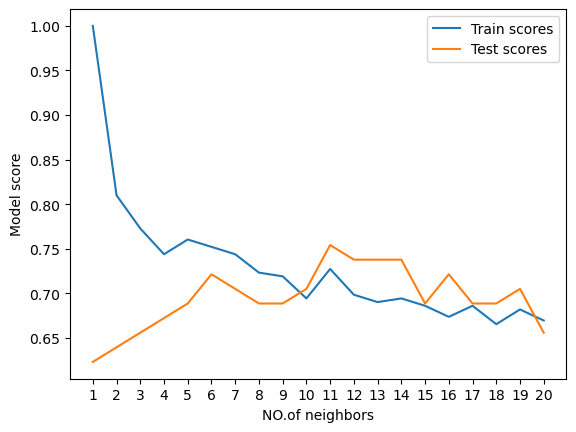

In [34]:
plt.plot(neighbors,train_scores)
plt.plot(neighbors,test_scores)
plt.xlabel('NO.of neighbors')
plt.xticks(np.arange(1,21,1))
plt.ylabel("Model score")
plt.legend(['Train scores','Test scores'])

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with Randomized Search cv

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

    ...using RandomizedSearchCV

In [35]:
# Create a hyperparameter grid for logistic Regression
log_reg_grid =  {"C": np.logspace(-4,4,20),
                "solver":['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
   "max_depth":[None,3,5,10],
    "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)} 

Noe we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV.


In [36]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for logisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=100,
                               verbose=True)

rs_log_reg.fit(x_train,y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\jayan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jayan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jayan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jayan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jayan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jayan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\jayan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jayan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jayan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jayan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which me

C:\Users\jayan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jayan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\jayan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jayan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\jayan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jayan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\jayan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jayan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\jayan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jayan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jayan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jayan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jayan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jayan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   verbose=True)

In [37]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [38]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [39]:
# Let's tune RandomForestClassifier

np.random.seed(42)

rs_model = RandomizedSearchCV(RandomForestClassifier(),
                             param_distributions=rf_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [40]:
rs_model.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [41]:
rs_model.score(x_test,y_test)

0.8688524590163934

## Hyperparameters Tuning with GrirdSearchCV

In [42]:
# Different parameters for our LogisticRegression model
log_reg_grid = {"C":np.logspace(-4,4,4),
                "solver":['lbfgs', 'liblinear', 'newton-cg']}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\jayan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jayan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 4.64158883e-02, 2.15443469e+01, 1.00000000e+04]),
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']},
             verbose=True)

In [43]:
gs_log_reg.best_params_

{'C': 21.54434690031882, 'solver': 'newton-cg'}

In [44]:
gs_log_reg.score(x_test,y_test)

0.8524590163934426

In [45]:
#model = LogisticRegression().fit(x_train,y_train)

## Evaluating the model

In [46]:
y_preds = gs_log_reg.predict(x_test)

In [47]:
from sklearn.metrics import classification_report
print(f"Accuracy score:{accuracy_score(y_test,y_preds)}")
print(f"Precision score:{precision_score(y_test,y_preds)}")
print(f"F1 Score:{f1_score(y_test,y_preds)}")
print(f"Cl_r:{classification_report(y_test,y_preds)}")

Accuracy score:0.8524590163934426
Precision score:0.8709677419354839
F1 Score:0.8571428571428571
Cl_r:              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [48]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [49]:
# Roc Curve
from sklearn.metrics import roc_curve  
y_probs = gs_log_reg.predict_proba(x_test)
y_probs_positive=y_probs[:, 1]
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

In [50]:
y_probs[:10],y_test[:10]

(array([[9.32403237e-01, 6.75967629e-02],
        [3.39228216e-01, 6.60771784e-01],
        [1.40201069e-01, 8.59798931e-01],
        [9.83288674e-01, 1.67113264e-02],
        [3.29278176e-02, 9.67072182e-01],
        [8.91365938e-02, 9.10863406e-01],
        [3.65083744e-01, 6.34916256e-01],
        [9.99046927e-01, 9.53072914e-04],
        [9.96448370e-01, 3.55162985e-03],
        [5.58497664e-01, 4.41502336e-01]]),
 179    0
 228    0
 111    1
 246    0
 60     1
 9      1
 119    1
 223    0
 268    0
 33     1
 Name: target, dtype: int64)

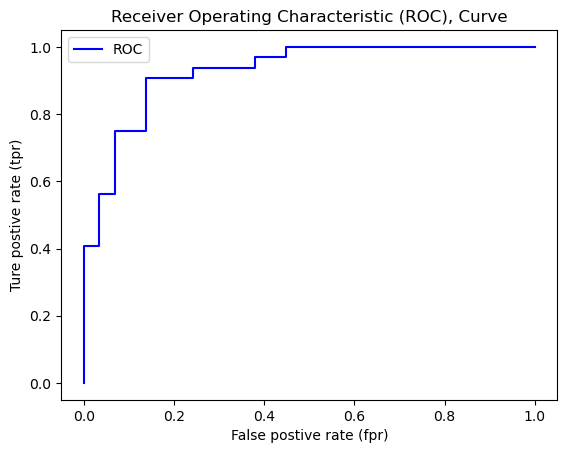

In [51]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a moel.
    
    """
    #Plot roc curve
    plt.plot(fpr,tpr, color = "blue", label="ROC")
    # plot line with no predictive power (baseline)
    #plt.plot([0,1],[0,1], color = "blue", linestyle = "--", label = "Guessing")
    
    # Customize the plot
    plt.xlabel("False postive rate (fpr)")
    plt.ylabel('Ture postive rate (tpr)')
    plt.title("Receiver Operating Characteristic (ROC), Curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [52]:
# confusion matix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 5 27]]


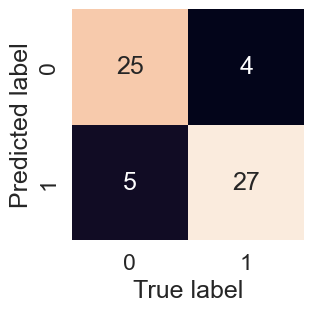

In [53]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    plots a nice looking confusion matrix using seaborn's heatmap
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test,y_preds)

In [54]:
np.random.seed(42)
model = RandomForestClassifier().fit(x_train,y_train)
model.score(x_test,y_test)

0.8360655737704918

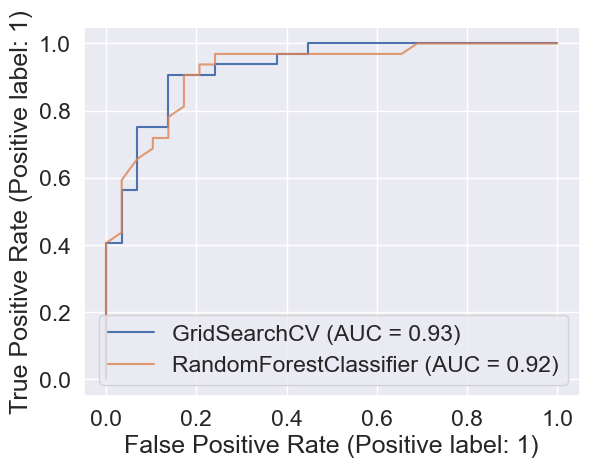

In [55]:
# another way of drawing roc Curve
from sklearn.metrics import RocCurveDisplay
log_reg_disp = RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(model, x_test, y_test, ax=ax,alpha =0.8)


## Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall and f1-score of our model using
`cross-validation()`

In [56]:
# Chectk best hyperparameters
gs_log_reg.best_params_

{'C': 21.54434690031882, 'solver': 'newton-cg'}

In [57]:
# Create a new classifier with the best parameter
clf = LogisticRegression(C= 21.54434690031882,
                         solver="liblinear")

In [58]:
# Cross-validation accuracy
cv_acc = cross_val_score(clf,x,y,cv=5,
                        scoring='accuracy')

cv_acc

array([0.81967213, 0.8852459 , 0.83606557, 0.88333333, 0.71666667])

In [59]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8281967213114754

In [60]:
# cross-validation precision
cv_pre = cross_val_score(clf,x,y,cv=5,
                        scoring="precision")

In [61]:
cv_pre = np.mean(cv_pre)
cv_pre

0.8231691919191919

In [62]:
# cross-validation recall
cv_rec = cross_val_score(clf,x,y,cv=5,
                        scoring='recall')

In [63]:
cv_rec = np.mean(cv_rec)
cv_rec

0.8787878787878787

In [64]:
# Cross validation F1 score
cv_f1 = cross_val_score(clf,x,y,cv=5,
                       scoring='f1')

In [65]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8489954136494248

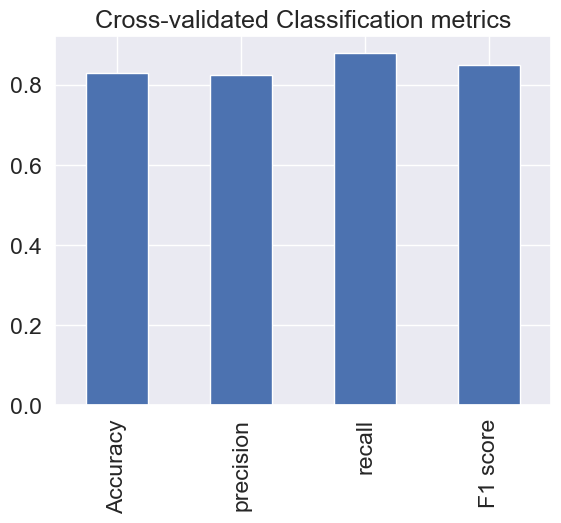

In [66]:
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "precision":cv_pre,
                           "recall":cv_rec,
                           "F1 score":cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-validated Classification metrics",
                     legend = False);

### Feature Importance

* Feature importance is another way of asking, "Which features contributed most to the outcomes of the model?" and how did they contribute

* Finding feature importance is different for each machine learning model. One way is to search for "(MODEL NAME) feature importance".

* Let's find the feature importance for Logistic Regression model..

In [67]:
# fit an istance of LogisticRegression
clf = LogisticRegression(C=21.54434690031882,
                        solver="liblinear")

clf.fit(x_train,y_train)

LogisticRegression(C=21.54434690031882, solver='liblinear')

In [68]:
# Check coef_
clf.coef_

array([[-0.00340057, -1.72595505,  0.8533906 , -0.01620405, -0.00346726,
         0.26559399,  0.59932995,  0.02143553, -1.112156  , -0.64413273,
         0.76736545, -0.84583813, -0.97635614]])

In [69]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [70]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': -0.003400571424033821,
 'sex': -1.7259550465124798,
 'cp': 0.8533905977510746,
 'trestbps': -0.01620404999937074,
 'chol': -0.0034672575163546848,
 'fbs': 0.26559399377558834,
 'restecg': 0.5993299497657987,
 'thalach': 0.02143552925826507,
 'exang': -1.1121560015514231,
 'oldpeak': -0.6441327285045768,
 'slope': 0.7673654479606066,
 'ca': -0.8458381285860939,
 'thal': -0.9763561355433709}

<AxesSubplot:title={'center':'Feature Importance'}>

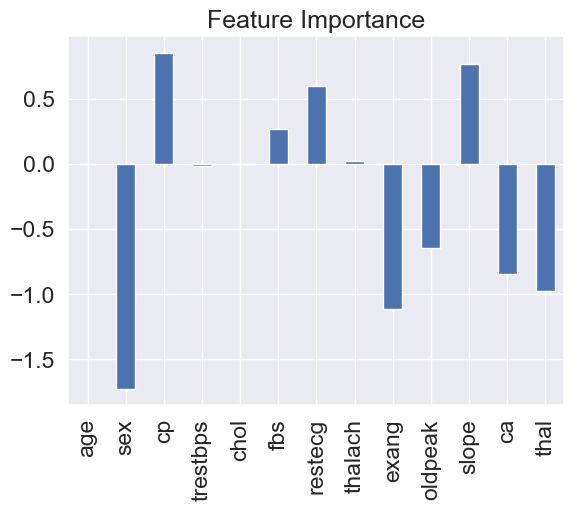

In [71]:
# Visulize the feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False)

In [72]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope-the slope of the peak exercise ST segment

* 0: Upsloping:better heart rate with exercise(uncommon)
* 1: Flatsloping:minimal change(typical healthy heart)
* 2: Downsloping:signs of unhealthy heart        
        

## 6. Experimentation

If you haven't hit your evaluation metric yet...ask yourself...
* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models?(beyond what we've done so far)
* If your model is good enough(you have hit your evaluation metric)how wouldyou export it and share it with others?                   

### Let's boost our model with XGboost Classifier

In [96]:
from xgboost import XGBClassifier
import xgboost as xgb
xg_model = XGBClassifier(n_estimators=2,
                        objective='binary:logistic',
                        verbosity=0,
                        learning_rate = 0.5,
                        gamma=1,
                        max_depth=5,
                        min_child_weight=2,
                        tree_method = 'hist')
xg_model.fit(x_train,y_train)
#y_preds=xg_model.predict(x_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=2, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [97]:
y_pred = xg_model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8524590163934426


In [98]:
xg_model.score(x_test,y_test)

0.8524590163934426

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

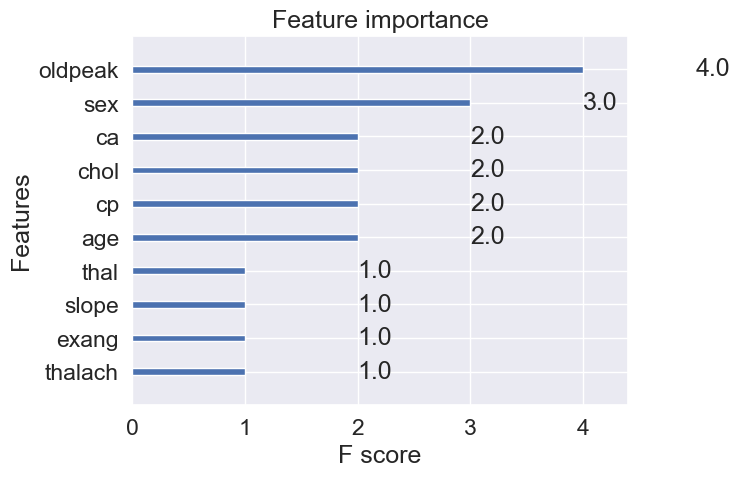

In [99]:
xgb.plot_importance(xg_model)

## Tuning the XGBoost Classifier

In [100]:
n_estimators = [int(x) for x in np.linspace(0,10,5)]
booster = ['gbtree','dart']
eta = [float(x) for x in np.linspace(0,1,10)]
gamma = [int(x) for x in np.linspace(0,10,10)]
max_depth = [int(x) for x in np.linspace(3,10,7)]
min_child_weight = [int(x) for x in np.linspace(0.5,5,5)]
reg_lambda = [0.5,1,2]
objective = ['binary:logistic']
eval_metric =['logloss','error']



param_grid = {"n_estimators":n_estimators,
           "booster":booster,
           "eta":eta,
           "gamma":gamma,
           "max_depth":max_depth,
           "min_child_weight":min_child_weight,
           "reg_lambda":reg_lambda,
           "objective":objective,
           "eval_metric":eval_metric
          }

In [133]:
rs_xg_model=RandomizedSearchCV(estimator=xg_model,
                              param_distributions=param_grid,
                              verbose=3,
                              cv = 5,
                              n_iter =200,
                              n_jobs=-1,
                              random_state=1)
rs_xg_model.fit(x_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\jayan\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.76011905 0.80161565 0.45042517 0.45042517 0.77670068 0.80977891
 0.78937075 0.73562925        nan 0.78078231 0.80136054 0.78069728
 0.79761905 0.77687075 0.77261905 0.78911565        nan 0.79336735
        nan        nan 0.79744898 0.75620748 0.78903061 0.79744898
 0.79736395 0.80170068 0.80561224 0.76037415 0.79328231 0.79328231
 0.79770408 0.80178571 0.82653061 0.75629252 0.78903061 0.80170068
 0.78920068 0.80994898 0.81811224        nan 0.45042517 0.81819728
 0.77670068 0.80561224        nan 0.80561224 0.75620748 0.79319728
 0.80170068 0.76445578 0.80153061 0.45042517 0.45042517 0.79761905
 0.81811224 0.75620748 0.78920068 0.78937075 0.79761905 0.79753401
        nan        nan 0.78928571 0.80578231 0.79736395 0.76454082
        nan        nan 0.80578231 0.81811224        nan 0.80187075
 0.45042517 0.80586735 0.80578231 0.80994898 0.814030

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=1, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0....
                                                0.3333333333333333,
                                                0.4444444444444444,
                                                0.5555555555555556,
                                                0.6666666666666666,
                                                0.7777777777777777,
                                                0.8888888888888888, 1.0],
                                        'eval_metric': ['logloss', 'error'],
                                        'gamma': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                  10],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10],
                                        'min_child_weight': [0, 1, 2, 3, 5],
                                        'n_estimators': [0, 2, 5, 7, 10],
                                        'objective': ['binary:logistic'],
                                        'reg_lambda': [0.5, 1, 2]},
                   random_state=1, verbose=3)

In [134]:
rs_xg_model.best_params_

{'reg_lambda': 2,
 'objective': 'binary:logistic',
 'n_estimators': 10,
 'min_child_weight': 3,
 'max_depth': 3,
 'gamma': 0,
 'eval_metric': 'error',
 'eta': 0.1111111111111111,
 'booster': 'dart'}

In [135]:
rs_xg_model.score(x_test,y_test)

0.8524590163934426

In [136]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

*** Finally Logistic Regression is the best algorithm for given dataset ***